In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
import os
from tqdm import tqdm
import cv2
import shutil

In [2]:
from google.colab import files

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c umor-classification

100% 193M/193M [00:01<00:00, 117MB/s]
100% 193M/193M [00:01<00:00, 137MB/s]


In [5]:
!unzip umor-classification.zip

Archive:  umor-classification.zip
  inflating: images/images/1006.png  
  inflating: images/images/1028.png  
  inflating: images/images/1046.png  
  inflating: images/images/1062.png  
  inflating: images/images/1066.png  
  inflating: images/images/1068.png  
  inflating: images/images/1070.png  
  inflating: images/images/1073.png  
  inflating: images/images/1091.png  
  inflating: images/images/1097.png  
  inflating: images/images/1105.png  
  inflating: images/images/1127.png  
  inflating: images/images/1138.png  
  inflating: images/images/1154.png  
  inflating: images/images/1156.png  
  inflating: images/images/1159.png  
  inflating: images/images/1183.png  
  inflating: images/images/1191.png  
  inflating: images/images/1202.png  
  inflating: images/images/1218.png  
  inflating: images/images/1230.png  
  inflating: images/images/1234.png  
  inflating: images/images/1235.png  
  inflating: images/images/1240.png  
  inflating: images/images/1253.png  
  inflating: ima

### Load the CSV files containing the data:

In [18]:
# # Load and preprocess training images
image_folder   = '/content/images/images/'

In [19]:
print(f"There are {len(os.listdir(image_folder ))} images in  dataset")

There are 775 images in  dataset


In [20]:
train_df  = pd.read_csv('trainset.csv')
test_df   = pd.read_csv('testset.csv')

In [55]:
train_df['Class'].value_counts()

Benign       300
Malignant    148
Normal        91
Name: Class, dtype: int64

In [21]:
train_df[:50]

,Unnamed: 0,Id,Class
0,211,8602,Malignant
1,315,7464,Malignant
2,165,5832,Malignant
3,188,2843,Malignant
4,710,5272,Benign
5,285,9436,Malignant
6,34,4050,Normal
7,708,7653,Benign
8,334,7048,Malignant
9,776,2885,Benign


In [22]:
image_filenames = os.listdir(image_folder)

In [23]:
id_to_label = dict(zip(train_df['Id'], train_df['Class']))

In [26]:
def load_images_with_labels(df):
    images = []
    labels = []
    for index, row in df.iterrows():
        image_id = row['Id']
        if image_id in id_to_label:
            label = id_to_label[image_id]

            image_path = os.path.join(image_folder, f"{image_id}.png")
            if os.path.exists(image_path):  # Check if the image file exists
                image = cv2.imread(image_path)  # Load the image using cv2

                if image is not None:  # Check if the image was loaded successfully
                    images.append(image)
                    labels.append(label)
                else:
                    print(f"Warning: Unable to load image: {image_path}")
            else:
                print(f"Warning: Image not found: {image_path}")
    return np.array(images), np.array(labels)

In [27]:
X_train, y_train = load_images_with_labels(train_df)

<ipython-input-26-878b7a590c36>:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(images), np.array(labels)


In [38]:
X_train.value_counts

(539,)

In [53]:
y_train

array(['Malignant', 'Malignant', 'Malignant', 'Malignant', 'Benign',
       'Malignant', 'Normal', 'Benign', 'Malignant', 'Benign', 'Benign',
       'Benign', 'Benign', 'Malignant', 'Benign', 'Benign', 'Benign',
       'Benign', 'Malignant', 'Malignant', 'Normal', 'Benign',
       'Malignant', 'Malignant', 'Malignant', 'Malignant', 'Benign',
       'Benign', 'Malignant', 'Benign', 'Benign', 'Benign', 'Benign',
       'Malignant', 'Benign', 'Benign', 'Benign', 'Benign', 'Benign',
       'Benign', 'Normal', 'Malignant', 'Benign', 'Normal', 'Malignant',
       'Benign', 'Normal', 'Benign', 'Benign', 'Benign', 'Normal',
       'Benign', 'Benign', 'Malignant', 'Malignant', 'Benign', 'Benign',
       'Malignant', 'Benign', 'Malignant', 'Benign', 'Benign',
       'Malignant', 'Benign', 'Normal', 'Malignant', 'Malignant',
       'Malignant', 'Benign', 'Benign', 'Malignant', 'Benign', 'Normal',
       'Benign', 'Benign', 'Benign', 'Normal', 'Benign', 'Malignant',
       'Normal', 'Normal', 'Mal

In [41]:
image_filenames = [filename for filename in os.listdir(image_folder) if filename.endswith(".png")]
image_ids = [int(image_id[:-4]) for image_id in image_filenames if image_id[:-4].isnumeric()]

# Get the image IDs included in the training set
train_image_ids = set(train_df['Id'])

In [42]:
# Get the image IDs from the test CSV
test_image_ids = list(test_df['Id'])

In [45]:
remaining_test_image_ids = [image_id for image_id in test_image_ids if image_id not in train_image_ids]

In [46]:
def load_remaining_test_images(image_ids):
    images = []
    for image_id in image_ids:
        image_path = os.path.join(image_folder, f"{image_id}.png")
        image = cv2.imread(image_path)
        if image is not None:
            images.append(image)
    return np.array(images)

In [49]:
X_test = load_remaining_test_images(remaining_test_image_ids)

<ipython-input-46-bcb36cf9c43c>:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(images)


In [51]:
X_test.shape

(229,)

In [56]:
from sklearn.utils import shuffle
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create separate lists for each class
benign_images = []
malignant_images = []
normal_images = []

# Iterate through the training data and populate the lists based on class
for image, label in zip(X_train, y_train):
    if label == "Benign":
        benign_images.append(image)
    elif label == "Malignant":
        malignant_images.append(image)
    elif label == "Normal":
        normal_images.append(image)

In [57]:
benign_images

[array([[[  5,   5,   5],
         [ 18,  18,  18],
         [151, 151, 151],
         ...,
         [132, 132, 132],
         [108, 108, 108],
         [ 69,  69,  69]],
 
        [[  1,   1,   1],
         [ 35,  35,  35],
         [133, 133, 133],
         ...,
         [122, 122, 122],
         [120, 120, 120],
         [105, 105, 105]],
 
        [[  7,   7,   7],
         [ 66,  66,  66],
         [ 96,  96,  96],
         ...,
         [139, 139, 139],
         [135, 135, 135],
         [128, 128, 128]],
 
        ...,
 
        [[ 60,  60,  60],
         [ 58,  58,  58],
         [ 58,  58,  58],
         ...,
         [ 70,  70,  70],
         [ 67,  67,  67],
         [ 64,  64,  64]],
 
        [[ 64,  64,  64],
         [ 67,  67,  67],
         [ 68,  68,  68],
         ...,
         [ 75,  75,  75],
         [ 74,  74,  74],
         [ 73,  73,  73]],
 
        [[ 46,  46,  46],
         [ 49,  49,  49],
         [ 51,  51,  51],
         ...,
         [ 85,  85,  85],
  

In [58]:
malignant_images

[array([[[202, 202, 202],
         [ 43,  43,  43],
         [  2,   2,   2],
         ...,
         [116, 116, 116],
         [107, 107, 107],
         [103, 103, 103]],
 
        [[203, 203, 203],
         [ 42,  42,  42],
         [  0,   0,   0],
         ...,
         [118, 118, 118],
         [109, 109, 109],
         [105, 105, 105]],
 
        [[198, 198, 198],
         [ 51,  51,  51],
         [  3,   3,   3],
         ...,
         [113, 113, 113],
         [106, 106, 106],
         [102, 102, 102]],
 
        ...,
 
        [[ 23,  23,  23],
         [ 23,  23,  23],
         [ 23,  23,  23],
         ...,
         [ 28,  28,  28],
         [ 27,  27,  27],
         [ 27,  27,  27]],
 
        [[ 28,  28,  28],
         [ 27,  27,  27],
         [ 25,  25,  25],
         ...,
         [ 33,  33,  33],
         [ 32,  32,  32],
         [ 31,  31,  31]],
 
        [[ 31,  31,  31],
         [ 29,  29,  29],
         [ 26,  26,  26],
         ...,
         [ 35,  35,  35],
  

In [59]:
normal_images

[array([[[ 76,  76,  76],
         [ 79,  79,  79],
         [ 79,  79,  79],
         ...,
         [ 70,  70,  70],
         [ 67,  67,  67],
         [ 65,  65,  65]],
 
        [[157, 157, 157],
         [159, 159, 159],
         [162, 162, 162],
         ...,
         [173, 173, 173],
         [166, 166, 166],
         [162, 162, 162]],
 
        [[142, 142, 142],
         [148, 148, 148],
         [159, 159, 159],
         ...,
         [181, 181, 181],
         [176, 176, 176],
         [172, 172, 172]],
 
        ...,
 
        [[  4,   4,   4],
         [  7,   7,   7],
         [ 12,  12,  12],
         ...,
         [ 13,  13,  13],
         [ 13,  13,  13],
         [ 13,  13,  13]],
 
        [[  7,   7,   7],
         [ 12,  12,  12],
         [ 14,  14,  14],
         ...,
         [ 16,  16,  16],
         [ 14,  14,  14],
         [ 12,  12,  12]],
 
        [[ 12,  12,  12],
         [ 17,  17,  17],
         [ 18,  18,  18],
         ...,
         [ 18,  18,  18],
  

In [106]:
# Define the image ID you want to plot
image_id_to_plot = 557

# Find the index of the image with the specified ID in the benign_images array
index_to_plot = np.where(train_df['Id'] == image_id_to_plot)[0]

if len(index_to_plot) > 0:
    index_to_plot = index_to_plot[0]  # Take the first index if multiple are found
    plt.figure(figsize=(5, 5))
    plt.imshow(benign_images[index_to_plot])
    plt.title(f"Image ID: {image_id_to_plot} - Class: Benign")
    plt.axis('off')
    plt.show()
else:
    print(f"Image ID not found: {image_id_to_plot}")

Image ID not found: 557


In [60]:
# Convert lists to numpy arrays
benign_images = np.array(benign_images)
malignant_images = np.array(malignant_images)
normal_images = np.array(normal_images)

<ipython-input-60-cff8334a8deb>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  benign_images = np.array(benign_images)
<ipython-input-60-cff8334a8deb>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  malignant_images = np.array(malignant_images)
<ipython-input-60-cff8334a8deb>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  norma

In [61]:
# Find the count of each class
benign_count = benign_images.shape[0]
malignant_count = malignant_images.shape[0]
normal_count = normal_images.shape[0]


In [62]:
# Determine the maximum class count
max_class_count = max(benign_count, malignant_count, normal_count)

In [63]:
max_class_count

300

In [108]:
# Function to perform data augmentation for medical images
def perform_data_augmentation(images, desired_count):
    augmented_images = []
    current_count = images.shape[0]

    while current_count < desired_count:
        random_index = np.random.randint(0, images.shape[0])
        original_image = images[random_index]

        datagen = ImageDataGenerator(
            rotation_range=15,
            width_shift_range=0.1,
            height_shift_range=0.1,
            shear_range=0.1,
            zoom_range=0.1,
            horizontal_flip=True,
            fill_mode='nearest'
        )

        augmented_image = datagen.random_transform(original_image)
        augmented_images.append(augmented_image)

        current_count += 1

    return np.array(augmented_images)


In [109]:
# Perform data augmentation for the minority classes
augmented_malignant = perform_data_augmentation(malignant_images, max_class_count)
augmented_normal = perform_data_augmentation(normal_images, max_class_count)


<ipython-input-108-1361ae04d553>:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(augmented_images)


In [110]:
# Concatenate the balanced data
balanced_X_train = np.concatenate((benign_images, augmented_malignant, augmented_normal))
balanced_y_train = np.concatenate((
    np.array(["Benign"] * benign_count),
    np.array(["Malignant"] * (max_class_count - malignant_count)),
    np.array(["Normal"] * (max_class_count - normal_count))
))


In [111]:
# Shuffle the balanced data
balanced_X_train, balanced_y_train = shuffle(balanced_X_train, balanced_y_train)


In [112]:
balanced_y_train

array(['Malignant', 'Normal', 'Benign', 'Malignant', 'Malignant',
       'Normal', 'Benign', 'Malignant', 'Benign', 'Normal', 'Benign',
       'Benign', 'Malignant', 'Malignant', 'Benign', 'Benign', 'Benign',
       'Normal', 'Benign', 'Benign', 'Normal', 'Normal', 'Normal',
       'Benign', 'Benign', 'Normal', 'Normal', 'Benign', 'Malignant',
       'Normal', 'Malignant', 'Benign', 'Benign', 'Malignant', 'Benign',
       'Normal', 'Malignant', 'Benign', 'Normal', 'Normal', 'Benign',
       'Malignant', 'Normal', 'Benign', 'Normal', 'Normal', 'Malignant',
       'Normal', 'Malignant', 'Benign', 'Benign', 'Benign', 'Malignant',
       'Normal', 'Normal', 'Benign', 'Normal', 'Normal', 'Benign',
       'Benign', 'Malignant', 'Malignant', 'Normal', 'Normal', 'Benign',
       'Normal', 'Benign', 'Benign', 'Normal', 'Normal', 'Normal',
       'Malignant', 'Benign', 'Benign', 'Benign', 'Malignant', 'Benign',
       'Benign', 'Normal', 'Benign', 'Benign', 'Malignant', 'Benign',
       'Benign'

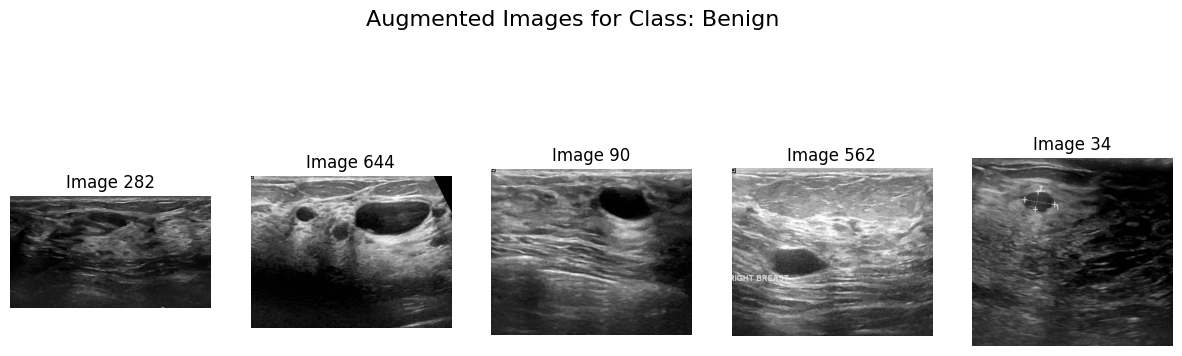

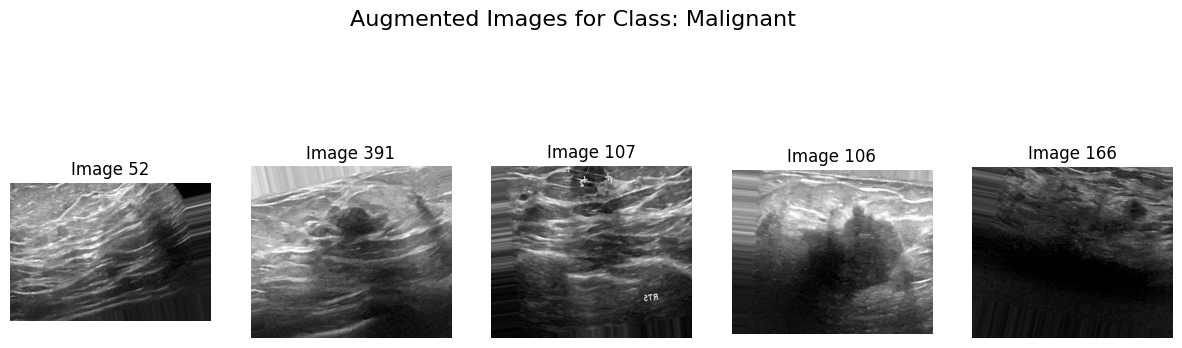

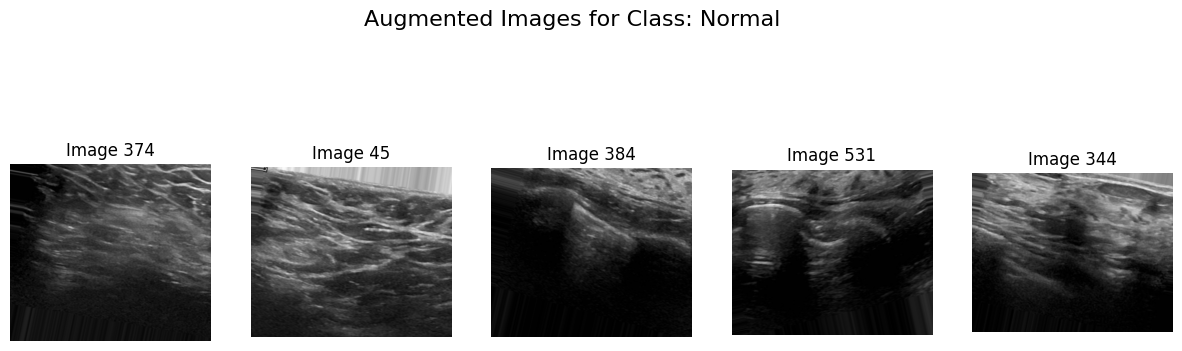

In [113]:
# Display a few augmented images for each class
unique_classes, class_counts = np.unique(balanced_y_train, return_counts=True)
num_images_to_visualize = 5

for class_name in unique_classes:
    class_indices = np.where(balanced_y_train == class_name)[0]
    random_indices = np.random.choice(class_indices, num_images_to_visualize, replace=False)

    plt.figure(figsize=(15, 5))
    plt.suptitle(f"Augmented Images for Class: {class_name}", fontsize=16)

    for i, index in enumerate(random_indices):
        plt.subplot(1, num_images_to_visualize, i + 1)
        plt.imshow(balanced_X_train[index])
        plt.title(f"Image {index}")
        plt.axis('off')

    plt.show()



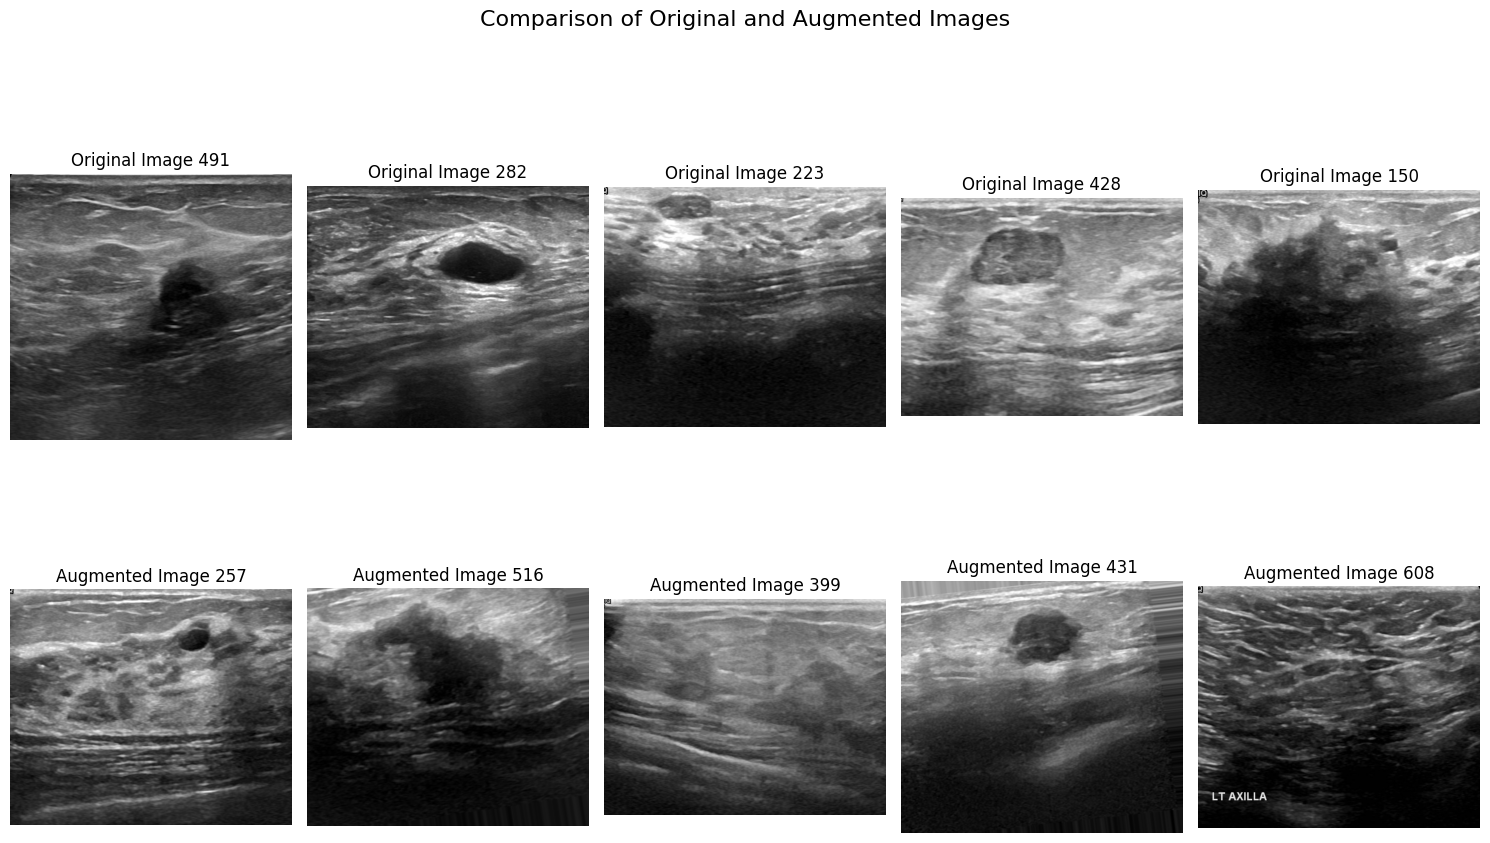

In [114]:
import random

# Choose random indices from both arrays
num_samples_to_visualize = 5
random_indices_original = random.sample(range(X_train.shape[0]), num_samples_to_visualize)
random_indices_balanced = random.sample(range(balanced_X_train.shape[0]), num_samples_to_visualize)

plt.figure(figsize=(15, 10))
plt.suptitle("Comparison of Original and Augmented Images", fontsize=16)

for i in range(num_samples_to_visualize):
    # Plot original image
    plt.subplot(2, num_samples_to_visualize, i + 1)
    plt.imshow(X_train[random_indices_original[i]])
    plt.title(f"Original Image {random_indices_original[i]}")
    plt.axis('off')

    # Plot augmented image
    plt.subplot(2, num_samples_to_visualize, num_samples_to_visualize + i + 1)
    plt.imshow(balanced_X_train[random_indices_balanced[i]])
    plt.title(f"Augmented Image {random_indices_balanced[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()